## Project Summary
This project was undertaken as part of a data mining competitions hosted on Kaggle’s website and is aimed at developing a "Blue Book" for Bulldozers challenge, i.e. estimating a statistical/machine-learning model(s) to predict the sale prices of used Buldozers. The contest is sponsored by Fast Iron, a company known for ‘creating enterprise data standards, cleaning data, and maintaining clean data’. Similar to Kelly’s Blue Book (www.kbb.com) which provides values on new and used automobiles, the purpose of the Blue Book competition is to develop a similar tool to help customers put a value on their equipment. Kaggle contestants are provided with the sales data from previous auctions to use in developing their submission.

We estimated a suite ofcompeting machine-learning/statistical models to predict the sale prices of used  buldozers, including Xgboost, Random Forest, Regularized Linear Regression, and Support Vector Machines. Notably, the Xgboost model proved to be the superior model in terms of performance. It is worth noting that the parsimonious model comprising features selected through the modeling process performed 
comparably( Rsquare of **73.9%** versus **74.3%**)  to the model with all features, including those with importance scores close to zero. The Random Forest model was the runner model with an Rsquare of approx. **73%**.

## Importing the python libaries

In [7]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
% matplotlib inline

from matplotlib import pyplot

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# for tree binarisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import xgboost as xgb

# to evaluate the models
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## Dataset 1

In [8]:
# loading the Training  dataset 1
data1 = pd.read_csv('Train.csv')

In [9]:
# Examing the first 5 rows of the dataset
data1.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Variable Types - Dataset 1 Training set

In [10]:
# let's inspect the type of variables in pandas
data1.dtypes

SalesID                       int64
SalePrice                     int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

This dataset is very large. Thus, manual inspection of each one of them is a bit time demanding. Therefore, here instead of deciding variable by variable what is the best way to proceed, I will try to automate the feature engineering pipeline, making some a priori decisions on when I will apply one technique or the other, and then expanding them to the entire dataset.

## Investigating Duplicate sales

In [11]:
# Checking duplicate sales transactions
data1.SalesID.duplicated().sum()

0

## Dataset 2

In [12]:
# loading Training dataset 2
data2 = pd.read_csv('Machine_Appendix.csv')

In [13]:
# Checking the first 5 rows of dataset 2
data2.head()

,MachineID,ModelID,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,fiProductClassDesc,ProductGroup,ProductGroupDesc,MfgYear,fiManufacturerID,fiManufacturerDesc,PrimarySizeBasis,PrimaryLower,PrimaryUpper
0,113,1355,350L,350,NaN,NaN,L,"Hydraulic Excavator, Track - 50.0 to 66.0 Metr...",TEX,Track Excavators,1994.0,26,Caterpillar,Weight - Metric Tons,50.0,66.0
1,434,3538,416C,416,C,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,BL,Backhoe Loaders,1997.0,26,Caterpillar,Standard Digging Depth - Ft,14.0,15.0
2,534,3538,416C,416,C,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,BL,Backhoe Loaders,1998.0,26,Caterpillar,Standard Digging Depth - Ft,14.0,15.0
3,718,3538,416C,416,C,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,BL,Backhoe Loaders,2000.0,26,Caterpillar,Standard Digging Depth - Ft,14.0,15.0
4,1753,1580,D5GLGP,D5,G,NaN,LGP,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",TTT,Track Type Tractors,2006.0,26,Caterpillar,Horsepower,85.0,105.0


## Variable Types - Dataset 2 -Test set

In [14]:
# let's inspect the type of variables in pandas
data2.dtypes

MachineID               int64
ModelID                 int64
fiModelDesc            object
fiBaseModel            object
fiSecondaryDesc        object
fiModelSeries          object
fiModelDescriptor      object
fiProductClassDesc     object
ProductGroup           object
ProductGroupDesc       object
MfgYear               float64
fiManufacturerID        int64
fiManufacturerDesc     object
PrimarySizeBasis       object
PrimaryLower          float64
PrimaryUpper          float64
dtype: object

In [15]:
# Extracting relevant variables from dataset 2
dataset2_rel = ['MachineID','ModelID', 'PrimarySizeBasis']

In [16]:
data2_rev = data2[dataset2_rel]

In [17]:
# Checking revised dataset 
data2_rev.head()

,MachineID,ModelID,PrimarySizeBasis
0,113,1355,Weight - Metric Tons
1,434,3538,Standard Digging Depth - Ft
2,534,3538,Standard Digging Depth - Ft
3,718,3538,Standard Digging Depth - Ft
4,1753,1580,Horsepower


In [18]:
# let's inspect the type of variables in pandas for dataset 2 revised
data2_rev.dtypes

MachineID            int64
ModelID              int64
PrimarySizeBasis    object
dtype: object

In [19]:
# checking dimensions of dataset 1 -Test set
data1.shape

(401125, 53)

In [20]:
# checking dimensions of dataset 2
data2_rev.shape

(358593, 3)

## Merging the two datasets - data1 and data2_rev - test

In [21]:
 data_new1 = pd.merge(data1,data2_rev, how='left', on=['MachineID', 'ModelID'])

In [23]:
# Checking types of variables in the merged datasets
data_new1.dtypes

SalesID                       int64
SalePrice                     int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

In [24]:
# Examing the top 5 rows of the merged dataset
data_new1.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operating Capacity - Lbs
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operating Capacity - Lbs


In [25]:
# Checking dimensions of the merged dataset
data_new1.shape

(401125, 54)

*There are a mixture of categorical and numerical variables. Numerical are those of type int and float. Categorical those of type object.*

In [26]:
print('Number of Sales Id labels in the Training Dataset: ', len(data_new1.SalesID.unique()))
print('Number of Sales in the Training Dataset: ', len(data_new1))

Number of Sales Id labels in the Training Dataset:  401125
Number of Sales in the Training Dataset:  401125


## Merging test data

In [27]:
# load test dataset 1
data_test = pd.read_csv('Test.csv')

In [28]:
# Checking the shape of the Test dataset
data_test.shape

(12457, 52)

In [29]:
# let's inspect the type of variables in pandas test data
data_test.dtypes

SalesID                       int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                  int64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [30]:
# merging test data with machine_appendix data
data_test_mer = pd.merge(data_test,data2_rev, how='left', on=['MachineID', 'ModelID'])

In [31]:
data_test_mer.shape

(12457, 53)

In [32]:
print('Number of Sales Id labels in the Test Dataset: ', len(data_test_mer.SalesID.unique()))
print('Number of Sales in the Test Dataset: ', len(data_test_mer))

Number of Sales Id labels in the Test Dataset:  12457
Number of Sales in the Test Dataset:  12457


In [33]:
# Checking the first 5 rows of the merged Text dataset
data_test_mer.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis
0,1227829,1006309,3168,121,3,1999,3688.0,Low,5/3/2012 0:00,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard Digging Depth - Ft
1,1227844,1022817,7271,121,3,1000,28555.0,High,5/10/2012 0:00,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,5/10/2012 0:00,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,Weight - Metric Tons
3,1227848,56204,1269,121,3,2006,8940.0,High,5/10/2012 0:00,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN,Weight - Metric Tons
4,1227863,1053887,22312,121,3,2005,2286.0,Low,5/10/2012 0:00,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,NaN


## Creating an Age variable for the Training dataset 

In [34]:
# Extracting the year from a time object
data_new1['saledate'] = pd.to_datetime(data_new1['saledate'])

In [35]:
#use the datetime attribute dt to access the datetime components
data_new1['yearsold'] = data_new1['saledate'].dt.year

In [36]:
#Checking if the new variable was created
data_new1.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,yearsold
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,2006
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,2004
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operating Capacity - Lbs,2004
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operating Capacity - Lbs,2009


In [37]:
# Checking data types for the yearsold and the YearMade variables
data_new1.yearsold.dtypes, data_new1.YearMade.dtypes

(dtype('int64'), dtype('int64'))

In [38]:
# Creating an Age variable
data_new1['MachineAge'] = data_new1['yearsold'] - data_new1['YearMade']


In [39]:
# Checking if the new MachineAge variable was created
data_new1.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,yearsold,MachineAge
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,2006,2
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,2004,8
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operating Capacity - Lbs,2004,3
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,10
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operating Capacity - Lbs,2009,2


 Some of the variables are superfluous and will be removed from the analysis:
    . SalesID
    . datasource
    . auctioneerID
    . YearMade
    . saledate
    . fiModelDesc
    . fiModelDescriptor
    . fiProductClassDesc 
    . yearsold
    . PrimaryUpper
    . PrimaryLower

## Creating an Age variable for the Test dataset

In [40]:
# Extracting the year from a time object
data_test_mer['saledate'] = pd.to_datetime(data_test_mer['saledate'])

In [41]:
#use the datetime attribute dt to access the datetime components
data_test_mer['yearsold'] = data_test_mer['saledate'].dt.year

In [42]:
#Checking if the new variable was created for the Test dataset
data_test_mer.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,yearsold
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard Digging Depth - Ft,2012
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,2012
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,Weight - Metric Tons,2012
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN,Weight - Metric Tons,2012
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,NaN,2012


In [43]:
# Checking the data types
data_test_mer.yearsold.dtypes, data_test_mer.YearMade.dtypes

(dtype('int64'), dtype('int64'))

In [44]:
# Creating an Age variable for the Test dataset
data_test_mer['MachineAge'] = data_test_mer['yearsold'] - data_test_mer['YearMade']

In [45]:
#Checking if the new variable was created in the Test dataset
data_test_mer.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,yearsold,MachineAge
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard Digging Depth - Ft,2012,13
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,2012,1012
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,Weight - Metric Tons,2012,8
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN,Weight - Metric Tons,2012,6
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,NaN,2012,7


### Types of problems within the variables in the Training dataset



## Missing values

In [46]:
# let's visualise the percentage of missing values in the Training dataset
for var in data_new1.columns:
    if data_new1[var].isnull().sum()>0:
        print(var, data_new1[var].isnull().mean())

auctioneerID 0.0501988158305
MachineHoursCurrentMeter 0.644088501091
UsageBand 0.826390775943
fiSecondaryDesc 0.342015581178
fiModelSeries 0.858129012153
fiModelDescriptor 0.820706762231
ProductSize 0.525459644749
Drive_System 0.73982923029
Enclosure 0.000810221252727
Forks 0.521154253662
Pad_Type 0.802719850421
Ride_Control 0.629526955438
Stick 0.802719850421
Transmission 0.543209722655
Turbocharged 0.802719850421
Blade_Extension 0.937129323777
Blade_Width 0.937129323777
Enclosure_Type 0.937129323777
Engine_Horsepower 0.937129323777
Hydraulics 0.200822686195
Pushblock 0.937129323777
Ripper 0.740387659707
Scarifier 0.937101900904
Tip_Control 0.937129323777
Tire_Size 0.763869118105
Coupler 0.466620130882
Coupler_System 0.891659707074
Grouser_Tracks 0.891899033967
Hydraulics_Flow 0.891899033967
Track_Type 0.752812714241
Undercarriage_Pad_Width 0.751020255531
Stick_Length 0.752650669991
Thumb 0.752476160798
Pattern_Changer 0.752650669991
Grouser_Type 0.752812714241
Backhoe_Mounting 0.8038

In [47]:
# let's inspect the type of those variables with a lot of missing information in the Training dataset
for var in data_new1.columns:
    if data_new1[var].isnull().mean()>0.4:
        print(var, data_new1[var].unique())

MachineHoursCurrentMeter [    68.   4640.   2838. ...,   8298.  35740.  12201.]
UsageBand ['Low' 'High' 'Medium' nan]
fiModelSeries [nan 'II' '-6E' 'LC' '-5' 'III' '-1' '5' '-2' '1' '#NAME?' '-3L' '-20' '3'
 '15' '-12' '6' '-6' 'V' '-3' '-3PT' '-21' '-7' '7' '-3MC' 'IV' '-21A'
 '-3LC' '-5L' '5N' '-5H' '-1L' '-8' '4' '2' '-18' '-15' '2T' '18' 'E' '-3C'
 '-6B' '7.00E+00' 'A' '-3LK' 'ZTS' '-2N' '12' 'V-2' 'XT' '-7E' '-2C' '-8E'
 '-6LC' '-3H' '16' 'IV-2' '-6K' '6F' '22' '3A' 'VHP' 'LGP' 'LT' '14FT' 'EX'
 '-6C' '3C' '-7K' '17' '1970' '-2LC' 'M' 'D' 'ZX' 'LV' '-5LC' '-5E'
 '6.00E+00' '-17' '-16' '-4' '8' '-7B' '-1C' '-11' 'L' '-6A' 'LL' -5.0 -2.0
 -8.0 -3.0 -7.0 2.0 'G' 'WX' '-2A' '-5F' '-3M' 'D7' '7A' ' III' 'AWS' '2B'
 '20' '-5A' '-6LK' '-2E' 'VI' 'H' '-1B' '-3EO' 'TC' 'Elite' 'WT' 'XLT'
 'SeriesII' '-1.50E+01' 'GALEO' '6L' '6LE' '6LK' '21KomStatII' '21KomStat'
 '7L' 'Q' 'ZHS' 'FASTRRACK']
fiModelDescriptor [nan 'LC' '6' 'L' 'LT' 'CR' 'SB' 'XL' 'LGP' 'VHP' '7' 'Z' '2.00E+00' 'MC'
 'H' 'E' 

### Types of problems within the variables in the Test dataset



## Missing Values

In [48]:
# let's visualise the percentage of missing values in the Test dataset
for var in data_test_mer.columns:
    if data_test_mer[var].isnull().sum()>0:
        print(var, data_test_mer[var].isnull().mean())

MachineHoursCurrentMeter 0.829092076744
UsageBand 0.852773540981
fiSecondaryDesc 0.319097696074
fiModelSeries 0.838966043189
fiModelDescriptor 0.757244922534
ProductSize 0.514489845067
Drive_System 0.778518102272
Enclosure 0.000160552299912
Forks 0.493618046079
Pad_Type 0.830777875893
Ride_Control 0.659548848037
Stick 0.830777875893
Transmission 0.613229509513
Turbocharged 0.830777875893
Blade_Extension 0.947740226379
Blade_Width 0.947740226379
Enclosure_Type 0.947740226379
Engine_Horsepower 0.947740226379
Hydraulics 0.171951513205
Pushblock 0.947740226379
Ripper 0.782933290519
Scarifier 0.947740226379
Tip_Control 0.947740226379
Tire_Size 0.776992855423
Coupler 0.389820984186
Coupler_System 0.834149474191
Grouser_Tracks 0.834149474191
Hydraulics_Flow 0.834149474191
Track_Type 0.72754274705
Undercarriage_Pad_Width 0.72722164245
Stick_Length 0.72754274705
Thumb 0.7274624709
Pattern_Changer 0.72754274705
Grouser_Type 0.72754274705
Backhoe_Mounting 0.835353616441
Blade_Type 0.834791683391


In [49]:
# let's inspect the type of those variables with a lot of missing information in the Test dataset
for var in data_test_mer.columns:
    if data_test_mer[var].isnull().mean()>0.1:
        print(var, data_test_mer[var].unique())

MachineHoursCurrentMeter [  3688.  28555.   6038. ...,   5603.   2871.   2233.]
UsageBand ['Low' 'High' 'Medium' nan]
fiSecondaryDesc ['G' nan 'B' 'C' 'K' 'E' 'US' 'MR' 'PX' 'LC' 'M' 'SUPER L' 'SUPER M'
 'SUPER K' 'J' 'MXT' 'N' 'H' 'D' 'Z' 'A' 'R' 'P' 'AG' 'UU' 'F' 'SE' 'XT'
 'LX' 'SG' 'L' 'SUPER E' 'TX' 'EX' 'SRLC' 'Q' 'CH' 'LE' 'BL' 'S' 'SUPER'
 'HZ' 'ZTS' 'X' 'B     ' 'PT' 'PS' 'NX' 'SJ' 'SR' '7' 'HD' ' MSR SPIN ACE'
 '5A' 'ZF' 'EST' 'C      ' 'USR' 'UR' 'U' 'XTD' '3' 'T' 'TM' 'HF' 'ZHS'
 'HAG' 'LGP' 'WT' 'TC' 'LCM' 'W' 'SX' 'WD' ' ZTS' 'UNA' 'H      ' '-7A'
 'BZD' 'DL' 'CS' 'DZ' 'EG']
fiModelSeries [nan '-5' 'IV' 'LC' '8' '-6' '-3MC' '-12' '5' '6' '-1L' '-3L' '-1' 'II' 'V'
 '-5L' '-2' '3' '-6E' 'III' '7' '2' '1' 'ZTS' '7.00E+00' '-3LK' '-7' '-3'
 '-7E' '-15' '#NAME?' '-21' '-2C' '-16' 'LGP' 'WT' 'XT' 'L' 'XLT' '-18'
 '6LE' '-2N' '15' '-20' '2T' 'LT' '-3C' 'E' '-5E' 'A' '4' ' III' 'IV-2'
 'V-2' '-8' '-3PT' 'AWS' '-3EO' '-3LC' '2B' '22' 'XR' '7A' '17']
fiModelDescriptor [nan 'LC' 'L'

** There are alot of variables with missing data in both the Training set and Test set and the variables are all categorical**

## Deleting superfluous variables from the Training and Test sets

In [50]:
# Deleting meaningless variables from the Training setdat
data_new1.drop(['yearsold','MachineID','ModelID','datasource','auctioneerID','YearMade','saledate','fiModelDesc','fiModelDescriptor','fiProductClassDesc'], axis=1,inplace=True)

In [51]:
data_new1.head()

,SalesID,SalePrice,MachineHoursCurrentMeter,UsageBand,fiBaseModel,fiSecondaryDesc,fiModelSeries,ProductSize,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,MachineAge
0,1139246,66000,68.0,Low,521,D,NaN,NaN,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,2
1,1139248,57000,4640.0,Low,950,F,II,Medium,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,8
2,1139249,10000,2838.0,High,226,NaN,NaN,NaN,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operating Capacity - Lbs,3
3,1139251,38500,3486.0,High,PC120,NaN,-6E,Small,Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,1139253,11000,722.0,Medium,S175,NaN,NaN,NaN,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operating Capacity - Lbs,2


In [52]:
#Deleting meaningless variables from the Test set
data_test_mer.drop(['yearsold','MachineID','ModelID','datasource','auctioneerID','YearMade','saledate','fiModelDesc','fiModelDescriptor','fiProductClassDesc'], axis=1,inplace=True)

In [53]:
# Checking that it worked
data_test_mer.head()

,SalesID,MachineHoursCurrentMeter,UsageBand,fiBaseModel,fiSecondaryDesc,fiModelSeries,ProductSize,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,MachineAge
0,1227829,3688.0,Low,580,G,NaN,NaN,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard Digging Depth - Ft,13
1,1227844,28555.0,High,936,NaN,NaN,Medium,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,1012
2,1227847,6038.0,Medium,EC210,B,NaN,Large / Medium,New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,Weight - Metric Tons,8
3,1227848,8940.0,High,330,C,NaN,Large / Medium,New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN,Weight - Metric Tons,6
4,1227863,2286.0,Low,650,K,NaN,NaN,Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,NaN,7


In [54]:
# Splitting the Training set in label and features
y_Train = data_new1['SalePrice']

In [55]:
#Checking
y_Train.shape

(401125,)

In [56]:
# Checking the first 5 rows dependent variable
y_Train.head()

0    66000
1    57000
2    10000
3    38500
4    11000
Name: SalePrice, dtype: int64

In [57]:
x_Train = data_new1

In [58]:
# Creating a separate dataset for submission to Kaggle
Submission=x_Train.copy

In [59]:
x_Train.head()

,SalesID,SalePrice,MachineHoursCurrentMeter,UsageBand,fiBaseModel,fiSecondaryDesc,fiModelSeries,ProductSize,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,MachineAge
0,1139246,66000,68.0,Low,521,D,NaN,NaN,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,2
1,1139248,57000,4640.0,Low,950,F,II,Medium,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,8
2,1139249,10000,2838.0,High,226,NaN,NaN,NaN,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operating Capacity - Lbs,3
3,1139251,38500,3486.0,High,PC120,NaN,-6E,Small,Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,1139253,11000,722.0,Medium,S175,NaN,NaN,NaN,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Operating Capacity - Lbs,2


In [60]:
x_Test = data_test_mer

In [61]:
#Checking 
x_Test.head()

,SalesID,MachineHoursCurrentMeter,UsageBand,fiBaseModel,fiSecondaryDesc,fiModelSeries,ProductSize,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,MachineAge
0,1227829,3688.0,Low,580,G,NaN,NaN,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard Digging Depth - Ft,13
1,1227844,28555.0,High,936,NaN,NaN,Medium,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,Horsepower,1012
2,1227847,6038.0,Medium,EC210,B,NaN,Large / Medium,New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,Weight - Metric Tons,8
3,1227848,8940.0,High,330,C,NaN,Large / Medium,New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN,Weight - Metric Tons,6
4,1227863,2286.0,Low,650,K,NaN,NaN,Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,NaN,7


In [62]:
x_Train.shape, x_Test.shape

((401125, 46), (12457, 45))

In [63]:
x_Train.shape, x_Test.shape

((401125, 46), (12457, 45))

In [63]:
# find categorical variables in the Training set
categorical_train = [var for var in x_Train.columns if x_Train[var].dtype=='O']
print('There are {} categorical variables in the Training set'.format(len(categorical_train)))

There are 42 categorical variables in the Training set


In [64]:
# find numerical variables
numerical_train = [var for var in x_Train.columns if x_Train[var].dtype!='O']
print('There are {} numerical variables in the Training set'.format(len(numerical_train)))

There are 4 numerical variables in the Training set


In [65]:
# find categorical variables in the Test set
categorical_test = [var for var in x_Test.columns if x_Test[var].dtype=='O']
print('There are {} categorical variables in the Test set'.format(len(categorical_test)))

There are 42 categorical variables in the Test set


In [66]:
# find numerical variables in the Test set
numerical_test = [var for var in x_Test.columns if x_Test[var].dtype!='O']
print('There are {} numerical variables in the Test set'.format(len(numerical_test)))

There are 3 numerical variables in the Test set


## Outliers

In [67]:
continuous_train = [var for var in numerical_train if var not in [ 'SalesID','SalePrice']]
continuous_train

['MachineHoursCurrentMeter', 'MachineAge']

In [68]:
continuous_test = [var for var in numerical_test if var not in [ 'SalesID','SalePrice']]
continuous_test

['MachineHoursCurrentMeter', 'MachineAge']

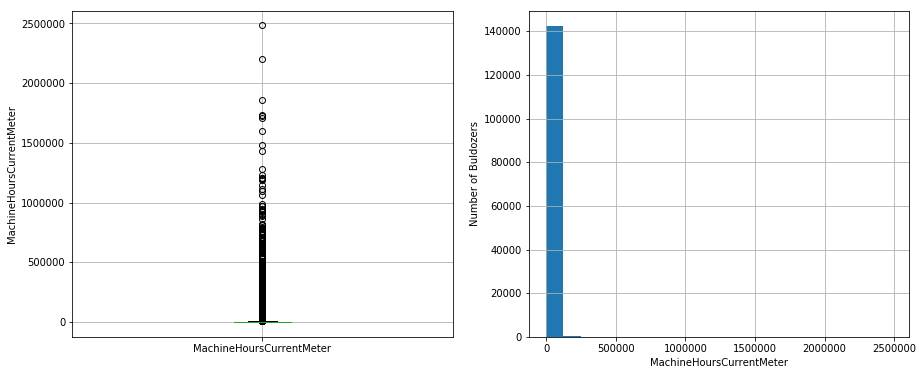

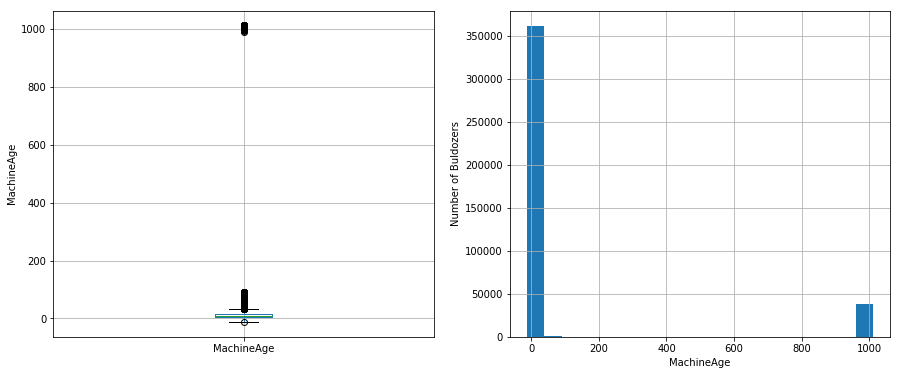

In [69]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution in the Training set

for var in continuous_train:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = x_Train.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = x_Train[var].hist(bins=20)
    fig.set_ylabel('Number of Buldozers')
    fig.set_xlabel(var)

    plt.show()

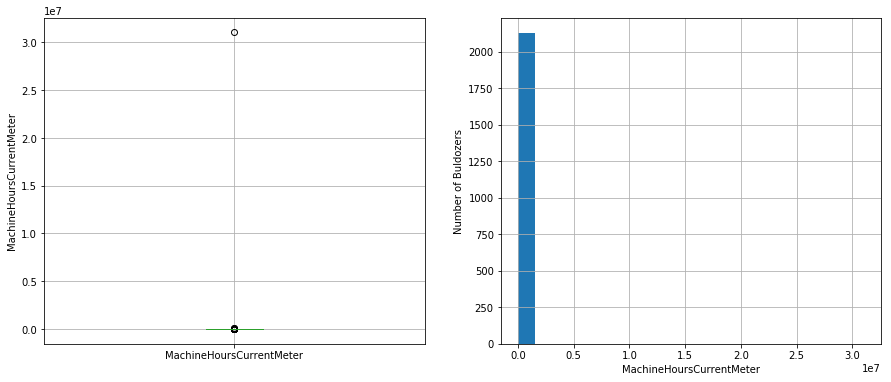

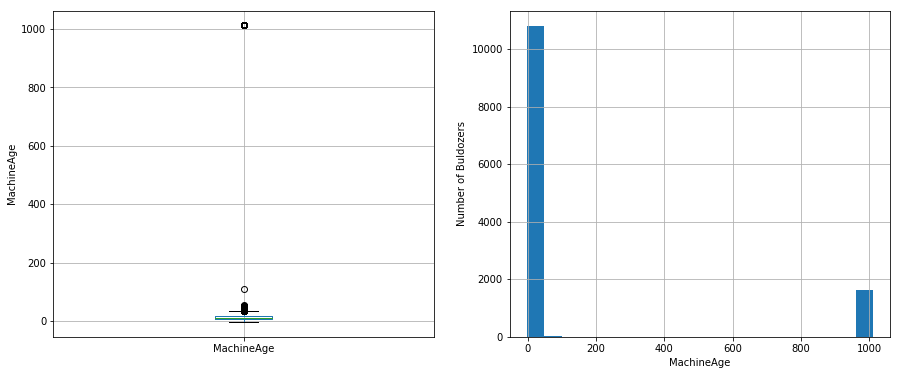

In [70]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution in the Test set

for var in continuous_test:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = x_Test.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = x_Test[var].hist(bins=20)
    fig.set_ylabel('Number of Buldozers')
    fig.set_xlabel(var)

    plt.show()

All of the continuous variables seem to contain outliers. In addition, the variables are not normally distributed. If we are planning to build linear regression, we might need to tackle these to improve the model performance. To tackle the 2 aspects together, I will do discretisation. And in particular, **I will use trees to find the right buckets onto which I will divide the variables.**

Note: there exist no discrete variables in the datasets.


#### Number of labels: cardinality

In [71]:
# Examining the number of labels for the categorical variables in the Training set
for var in categorical_train:
    print(var, ' contains ', len(x_Train[var].unique()), ' labels')

UsageBand  contains  4  labels
fiBaseModel  contains  1950  labels
fiSecondaryDesc  contains  176  labels
fiModelSeries  contains  129  labels
ProductSize  contains  7  labels
state  contains  53  labels
ProductGroup  contains  6  labels
ProductGroupDesc  contains  6  labels
Drive_System  contains  5  labels
Enclosure  contains  7  labels
Forks  contains  3  labels
Pad_Type  contains  5  labels
Ride_Control  contains  4  labels
Stick  contains  3  labels
Transmission  contains  9  labels
Turbocharged  contains  3  labels
Blade_Extension  contains  3  labels
Blade_Width  contains  7  labels
Enclosure_Type  contains  4  labels
Engine_Horsepower  contains  3  labels
Hydraulics  contains  13  labels
Pushblock  contains  3  labels
Ripper  contains  5  labels
Scarifier  contains  3  labels
Tip_Control  contains  4  labels
Tire_Size  contains  18  labels
Coupler  contains  4  labels
Coupler_System  contains  3  labels
Grouser_Tracks  contains  3  labels
Hydraulics_Flow  contains  4  labels
Tr

In [72]:
# Examining the number of labels for the categorical variables in the Test set
for var in categorical_test:
    print(var, ' contains ', len(x_Test[var].unique()), ' labels')

UsageBand  contains  4  labels
fiBaseModel  contains  831  labels
fiSecondaryDesc  contains  83  labels
fiModelSeries  contains  64  labels
ProductSize  contains  7  labels
state  contains  51  labels
ProductGroup  contains  6  labels
ProductGroupDesc  contains  6  labels
Drive_System  contains  5  labels
Enclosure  contains  4  labels
Forks  contains  3  labels
Pad_Type  contains  5  labels
Ride_Control  contains  4  labels
Stick  contains  3  labels
Transmission  contains  8  labels
Turbocharged  contains  3  labels
Blade_Extension  contains  3  labels
Blade_Width  contains  7  labels
Enclosure_Type  contains  4  labels
Engine_Horsepower  contains  3  labels
Hydraulics  contains  12  labels
Pushblock  contains  3  labels
Ripper  contains  5  labels
Scarifier  contains  3  labels
Tip_Control  contains  4  labels
Tire_Size  contains  14  labels
Coupler  contains  4  labels
Coupler_System  contains  3  labels
Grouser_Tracks  contains  3  labels
Hydraulics_Flow  contains  4  labels
Track

Most of the variables have variables do not have a lot of labels, but some have very high levels of cardinality.

### Engineering missing values in numerical variables (section 5)
#### Continuous variables

In [73]:
# print variables with missing data in Training set
for col in continuous_train:
    if x_Train[col].isnull().mean()>0:
        print(col, x_Train[col].isnull().mean())

MachineHoursCurrentMeter 0.644088501091


In [74]:
# print variables with missing data in Test set
for col in continuous_test:
    if x_Test[col].isnull().mean()>0:
        print(col, x_Test[col].isnull().mean())

MachineHoursCurrentMeter 0.829092076744


- If a variable contains < 50% NA: create additional variable with NA + random sample imputation
- If a variable contains > 50% NA: impute NA by value far in the distribution

In [75]:
# MachineHoursCurrentMeter 
extreme = x_Train.MachineHoursCurrentMeter.mean() + x_Train.MachineHoursCurrentMeter.std()*3
for df in [x_Train, x_Test]:
    df.MachineHoursCurrentMeter.fillna(extreme, inplace=True)

### Engineering Missing Data in categorical variables

In [76]:
# print variables with missing data in Training set
for col in categorical_train:
    if x_Train[col].isnull().mean()>0:
        print(col, x_Train[col].isnull().mean())

UsageBand 0.826390775943
fiSecondaryDesc 0.342015581178
fiModelSeries 0.858129012153
ProductSize 0.525459644749
Drive_System 0.73982923029
Enclosure 0.000810221252727
Forks 0.521154253662
Pad_Type 0.802719850421
Ride_Control 0.629526955438
Stick 0.802719850421
Transmission 0.543209722655
Turbocharged 0.802719850421
Blade_Extension 0.937129323777
Blade_Width 0.937129323777
Enclosure_Type 0.937129323777
Engine_Horsepower 0.937129323777
Hydraulics 0.200822686195
Pushblock 0.937129323777
Ripper 0.740387659707
Scarifier 0.937101900904
Tip_Control 0.937129323777
Tire_Size 0.763869118105
Coupler 0.466620130882
Coupler_System 0.891659707074
Grouser_Tracks 0.891899033967
Hydraulics_Flow 0.891899033967
Track_Type 0.752812714241
Undercarriage_Pad_Width 0.751020255531
Stick_Length 0.752650669991
Thumb 0.752476160798
Pattern_Changer 0.752650669991
Grouser_Type 0.752812714241
Backhoe_Mounting 0.803871611094
Blade_Type 0.80097725148
Travel_Controls 0.800974758492
Differential_Type 0.826959177314
Stee

- If a variable has low NA then NA imputed by most frequent category
- If a variable has high NA imputed by 'Missing'

In [78]:
# Imputing missing data in Training and Test sets with the word "Missing"
for col in categorical_train:
    if x_Train[col].isnull().mean()<.08:
        for df in [x_Train, x_Test]:
            df[col].fillna(x_Train[col].mode()[0], inplace=True) 
    else:
        for df in [x_Train, x_Test]:
            df[col].fillna('Missing', inplace=True)          
         

In [79]:
# check absence of null values
x_Train.isnull().sum()

SalesID                     0
SalePrice                   0
MachineHoursCurrentMeter    0
UsageBand                   0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
ProductSize                 0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier                   0
Tip_Control                 0
Tire_Size                   0
Coupler                     0
Coupler_System              0
Grouser_Tracks              0
Hydraulics_Flow             0
Track_Type

In [80]:
# Checking the test set for missing values
x_Test.isnull().sum()

SalesID                     0
MachineHoursCurrentMeter    0
UsageBand                   0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
ProductSize                 0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier                   0
Tip_Control                 0
Tire_Size                   0
Coupler                     0
Coupler_System              0
Grouser_Tracks              0
Hydraulics_Flow             0
Track_Type                  0
Undercarri

In [81]:
# Checking Training set after imputation
x_Train.head()

,SalesID,SalePrice,MachineHoursCurrentMeter,UsageBand,fiBaseModel,fiSecondaryDesc,fiModelSeries,ProductSize,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,MachineAge
0,1139246,66000,68.0,Low,521,D,Missing,Missing,Alabama,WL,Wheel Loader,Missing,EROPS w AC,None or Unspecified,Missing,None or Unspecified,Missing,Missing,Missing,Missing,Missing,Missing,Missing,2 Valve,Missing,Missing,Missing,Missing,None or Unspecified,None or Unspecified,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Standard,Conventional,Horsepower,2
1,1139248,57000,4640.0,Low,950,F,II,Medium,North Carolina,WL,Wheel Loader,Missing,EROPS w AC,None or Unspecified,Missing,None or Unspecified,Missing,Missing,Missing,Missing,Missing,Missing,Missing,2 Valve,Missing,Missing,Missing,Missing,23.5,None or Unspecified,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Standard,Conventional,Horsepower,8
2,1139249,10000,2838.0,High,226,Missing,Missing,Missing,New York,SSL,Skid Steer Loaders,Missing,OROPS,None or Unspecified,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Auxiliary,Missing,Missing,Missing,Missing,Missing,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Operating Capacity - Lbs,3
3,1139251,38500,3486.0,High,PC120,Missing,-6E,Small,Texas,TEX,Track Excavators,Missing,EROPS w AC,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,2 Valve,Missing,Missing,Missing,Missing,Missing,None or Unspecified,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Horsepower,10
4,1139253,11000,722.0,Medium,S175,Missing,Missing,Missing,New York,SSL,Skid Steer Loaders,Missing,EROPS,None or Unspecified,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Auxiliary,Missing,Missing,Missing,Missing,Missing,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Operating Capacity - Lbs,2


In [82]:
# Checking Test set after imputation
x_Test.head()

,SalesID,MachineHoursCurrentMeter,UsageBand,fiBaseModel,fiSecondaryDesc,fiModelSeries,ProductSize,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,MachineAge
0,1227829,3688.0,Low,580,G,Missing,Missing,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Standard Digging Depth - Ft,13
1,1227844,28555.0,High,936,Missing,Missing,Medium,Virginia,WL,Wheel Loader,Missing,EROPS,Yes,Missing,None or Unspecified,Missing,Missing,Missing,Missing,Missing,Missing,Missing,2 Valve,Missing,Missing,Missing,Missing,20.5,None or Unspecified,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Standard,Conventional,Horsepower,1012
2,1227847,6038.0,Medium,EC210,B,Missing,Large / Medium,New Jersey,TEX,Track Excavators,Missing,EROPS w AC,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Auxiliary,Missing,Missing,Missing,Missing,Missing,None or Unspecified,Missing,Missing,Missing,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,Missing,Missing,Missing,Missing,Missing,Weight - Metric Tons,8
3,1227848,8940.0,High,330,C,Missing,Large / Medium,New Jersey,TEX,Track Excavators,Missing,EROPS w AC,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Standard,Missing,Missing,Missing,Missing,Missing,None or Unspecified,Missing,Missing,Missing,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,Missing,Missing,Missing,Missing,Missing,Weight - Metric Tons,6
4,1227863,2286.0,Low,650,K,Missing,Missing,Florida,TTT,Track Type Tractors,Missing,OROPS,Missing,Missing,Missing,Missing,Hydrostatic,Missing,Missing,Missing,Missing,Missing,2 Valve,Missing,None or Unspecified,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,None or Unspecified,PAT,None or Unspecified,Missing,Missing,Horsepower,7


## Imputation - Rare - Test and Training Set

In [83]:
def rare_imputation(variable, which='rare'):    
    # find frequent labels
    temp = x_Train.groupby([variable])[variable].count()/np.float(len(x_Train))
    frequent_cat = [x for x in temp.loc[temp>0.02].index.values]
    
    # create new variables, with Rare labels imputed
    x_Train[variable] = np.where(x_Train[variable].isin(frequent_cat), x_Train[variable], 'Rare')
    x_Test[variable] = np.where(x_Test[variable].isin(frequent_cat), x_Test[variable], 'Rare')

In [84]:
#Imputing "rare" for rare labels
for col in categorical_train:
    rare_imputation(col, 'rare')

In [86]:
# Checking result of imputation
for col in categorical_train:
    print(x_Train[col].value_counts()/np.float(len(x_Train)))

Missing    0.826391
Medium     0.084724
Low        0.058884
High       0.030001
Name: UsageBand, dtype: float64
Rare    0.819779
580     0.049356
310     0.043263
D6      0.032683
416     0.031629
D5      0.023289
Name: fiBaseModel, dtype: float64
Missing    0.342016
Rare       0.177910
C          0.107784
B          0.097733
G          0.090805
H          0.059956
E          0.052472
D          0.048506
F          0.022818
Name: fiSecondaryDesc, dtype: float64
Missing    0.858129
Rare       0.086681
II         0.032912
LC         0.022277
Name: fiModelSeries, dtype: float64
Missing           0.525460
Medium            0.155248
Large / Medium    0.123847
Small             0.066049
Mini              0.061926
Large             0.052290
Rare              0.015180
Name: ProductSize, dtype: float64
Rare              0.196166
Florida           0.159412
Texas             0.128843
California        0.072344
Washington        0.039776
Georgia           0.035672
Maryland          0.032322
Missis

In [87]:
# Checking result of imputation - Test set
for col in categorical_train:
    print(x_Test[col].value_counts()/np.float(len(x_Test)))

Missing    0.852774
Medium     0.066308
Low        0.065104
High       0.015814
Name: UsageBand, dtype: float64
Rare    0.846271
310     0.041583
580     0.037569
D6      0.033074
D5      0.022477
416     0.019025
Name: fiBaseModel, dtype: float64
Missing    0.319098
Rare       0.212892
G          0.114955
C          0.107169
B          0.081962
D          0.056996
H          0.048246
E          0.039656
F          0.019025
Name: fiSecondaryDesc, dtype: float64
Missing    0.838966
Rare       0.094646
II         0.042466
LC         0.023922
Name: fiModelSeries, dtype: float64
Missing           0.514490
Medium            0.162961
Large / Medium    0.136068
Mini              0.080035
Small             0.058120
Large             0.035643
Rare              0.012684
Name: ProductSize, dtype: float64
Rare              0.247331
Texas             0.172754
Florida           0.088223
California        0.069840
Georgia           0.045195
Maryland          0.044312
Illinois          0.037650
Tennes

### Outliers in Numerical variables (15)

In order to tackle outliers and skewed distributions at the same time, I suggested I would do discretisation. And in order to find the optimal buckets automatically, I would use decision trees to find the buckets for me.

In [92]:
def tree_binariser(var):
    score_ls = [] # here I will store the mse

    for tree_depth in [1,2,3,4]:
        # call the model
        tree_model = DecisionTreeRegressor(max_depth=tree_depth)

        # train the model using 3 fold cross validation
        scores = cross_val_score(tree_model, x_Train[var].to_frame(), y_Train, cv=3, scoring='neg_mean_squared_error')
        score_ls.append(np.mean(scores))

    # find depth with smallest mse
    depth = [1,2,3,4][np.argmax(score_ls)]
    #print(score_ls, np.argmax(score_ls), depth)

    # transform the variable using the tree
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(x_Train[var].to_frame(), x_Train.SalePrice)
    x_Train[var] = tree_model.predict(x_Train[var].to_frame())
    x_Test[var] = tree_model.predict(x_Test[var].to_frame())
    

In [89]:
continuous_train

['MachineHoursCurrentMeter', 'MachineAge']

In [90]:
continuous_test

['MachineHoursCurrentMeter', 'MachineAge']

In [93]:
for var in continuous_train:
    tree_binariser(var)

In [94]:
for var in continuous_test:
    tree_binariser(var)

In [95]:
x_Train[continuous_train].head()

,MachineHoursCurrentMeter,MachineAge
0,30210.356930,45613.739433
1,40332.445579,32022.027750
2,30210.356930,42968.756966
3,40332.445579,30439.543667
4,30210.356930,45613.739433


In [96]:
for var in continuous_train:
    print(var, len(x_Train[var].unique()))

MachineHoursCurrentMeter 2
MachineAge 13


In [97]:
x_Test[continuous_test].head()

,MachineHoursCurrentMeter,MachineAge
0,40332.445579,28768.601111
1,40332.445579,23812.767985
2,40332.445579,32022.027750
3,40332.445579,33689.341183
4,30210.356930,33689.341183


In [98]:
for var in continuous_test:
    print(var, len(x_Test[var].unique()))

MachineHoursCurrentMeter 2
MachineAge 13


### Encode categorical and discrete variables (section 10)

In [99]:
def encode_categorical_variables(var, target):
        # make label to price dictionary
        ordered_labels = x_Train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        x_Train[var] = x_Train[var].map(ordered_labels)
        x_Test[var] = x_Test[var].map(ordered_labels)
        

# encode labels in categorical vars
for var in categorical_train:
    encode_categorical_variables(var, 'SalePrice')
    

In [100]:
#let's inspect the dataset
x_Train.head()

,SalesID,SalePrice,MachineHoursCurrentMeter,UsageBand,fiBaseModel,fiSecondaryDesc,fiModelSeries,ProductSize,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,MachineAge
0,1139246,66000,30210.356930,28334.130440,31448.126289,29402.883487,29981.266010,23979.399753,35369.592778,37052.463249,37052.463249,32431.888757,51777.326782,23512.603724,33608.04452,34754.662273,33608.04452,31016.734588,33608.04452,30002.690135,30002.690135,30002.690135,30002.690135,35997.191600,30002.690135,28322.244623,30002.8219,30002.690135,35109.295712,30256.342249,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,29816.728063,29831.619645,29832.178505,36854.326664,36975.240306,37118.131466,45613.739433
1,1139248,57000,40332.445579,28334.130440,31448.126289,42141.415383,47733.102257,45476.506680,32134.863995,37052.463249,37052.463249,32431.888757,51777.326782,23512.603724,33608.04452,34754.662273,33608.04452,31016.734588,33608.04452,30002.690135,30002.690135,30002.690135,30002.690135,35997.191600,30002.690135,28322.244623,30002.8219,30002.690135,47058.113208,30256.342249,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,29816.728063,29831.619645,29832.178505,36854.326664,36975.240306,37118.131466,32022.027750
2,1139249,10000,30210.356930,44477.643344,31448.126289,23397.791284,29981.266010,23979.399753,25555.172013,10549.458563,10549.458563,32431.888757,22557.918241,23512.603724,33608.04452,32613.419521,33608.04452,31016.734588,33608.04452,30002.690135,30002.690135,30002.690135,30002.690135,25052.796058,30002.690135,28322.244623,30002.8219,30002.690135,28361.684325,30256.342249,10470.911551,10382.497322,10507.249299,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,10503.305339,42968.756966
3,1139251,38500,40332.445579,44477.643344,31448.126289,23397.791284,31824.062640,32370.001359,32939.036396,35666.120622,35666.120622,32431.888757,51777.326782,37194.246441,33608.04452,32613.419521,33608.04452,31016.734588,33608.04452,30002.690135,30002.690135,30002.690135,30002.690135,35997.191600,30002.690135,28322.244623,30002.8219,30002.690135,28361.684325,30256.342249,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,37118.131466,30439.543667
4,1139253,11000,30210.356930,36970.215330,31448.126289,23397.791284,29981.266010,23979.399753,25555.172013,10549.458563,10549.458563,32431.888757,28745.229806,23512.603724,33608.04452,32613.419521,33608.04452,31016.734588,33608.04452,30002.690135,30002.690135,30002.690135,30002.690135,25052.796058,30002.690135,28322.244623,30002.8219,30002.690135,28361.684325,30256.342249,10470.911551,10382.497322,10507.249299,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,10503.305339,45613.739433


We can see that the labels have now been replaced by the mean house price.

### Feature scaling (section 13)

In [101]:
x_Train.describe()

,SalesID,SalePrice,MachineHoursCurrentMeter,UsageBand,fiBaseModel,fiSecondaryDesc,fiModelSeries,ProductSize,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,MachineAge
count,4.011250e+05,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000
mean,1.919713e+06,31099.712848,31099.712848,31099.712848,31099.712848,31099.712848,31099.712848,31099.712848,31099.712848,31099.712848,31099.712848,31099.712847,31099.712848,31099.712848,31099.712847,31099.712848,31099.712847,31099.712848,31099.712847,31099.712848,31099.712848,31099.712848,31099.712848,31099.712848,31099.712848,31099.712848,31099.712847,31099.712848,31099.712847,31099.712848,31099.712848,31099.712848,31099.712848,31099.712848,31099.712848,31099.712847,31099.712848,31099.712847,31099.712848,31099.712848,31099.712847,31099.712848,31099.712848,31099.712848,31099.712848,31099.712848
std,9.090215e+05,23036.898502,2865.520190,3065.073987,5290.441926,7565.972019,3963.486219,10845.730404,2323.607732,9982.103252,9982.103252,6389.894685,11279.521418,6787.228960,5136.467054,6020.141768,5125.622351,4412.837548,5070.509373,4280.347261,4811.162828,5374.724137,4913.389025,7544.772289,5081.385771,6169.537673,4253.482141,4258.323208,5557.779074,2105.720475,7164.070985,7159.189376,7157.140258,4882.143631,2781.960627,4250.816418,2760.681221,3711.430378,3020.247593,2601.235282,4895.016000,4258.427242,3031.931084,3024.526436,9264.797734,7110.567412
min,1.139246e+06,4750.000000,30210.356930,28334.130440,20016.801596,23397.791284,29981.266010,15149.894686,25420.216276,10549.458563,10549.458563,18310.681983,22557.918241,23512.603724,20201.640298,20728.651001,19440.228819,25966.030035,20723.421654,30002.690135,30002.690135,30002.690135,30002.690135,20978.169611,30002.690135,28322.244623,30002.821900,30002.690135,28361.684325,30256.342249,10470.911551,10382.497322,10507.249299,15746.541302,29570.555118,29565.690564,29565.729818,29411.538462,29565.657382,16462.500000,29831.619645,29832.178505,29815.001137,29814.778141,10503.305339,17951.619644
25%,1.418371e+06,14500.000000,30210.356930,30209.249944,31448.126289,23397.791284,29981.266010,23979.399753,29787.451256,20897.352553,20897.352553,32431.888757,22557.918241,23512.603724,33608.044520,32613.419521,33608.044520,28285.938765,33608.044520,30002.690135,30002.690135,30002.690135,30002.690135,25052.796058,30002.690135,28322.244623,30002.821900,30002.690135,28361.684325,30256.342249,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,21100.720674,25728.332737
50%,1.639422e+06,24000.000000,30210.356930,30209.249944,31448.126289,29402.883487,29981.266010,23979.399753,30981.542823,35666.120622,35666.120622,32431.888757,28745.229806,37194.246441,33608.044520,32613.419521,33608.044520,31016.734588,33608.044520,30002.690135,30002.690135,30002.690135,30002.690135,29274.054097,30002.690135,28322.244623,30002.821900,30002.690135,28361.684325,31103.99474

## Taking a Random Sample of the X_Train data set

In [102]:
# Taking a Random Sample of 10000 observations from the x_Train
# you can use random_state for reproducibility
x_Train_RS = x_Train.sample(n=10000, random_state=2)

In [103]:
# Taking a Random Sample of 10000 observations from the x_Test
# you can use random_state for reproducibility
x_Test_RS = x_Test.sample(n=10000, random_state=2)

In [104]:
#Checking the sample
x_Train_RS.head()

,SalesID,SalePrice,MachineHoursCurrentMeter,UsageBand,fiBaseModel,fiSecondaryDesc,fiModelSeries,ProductSize,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,MachineAge
315789,2284133,33000,30210.35693,30209.249944,31448.126289,28885.699385,47733.102257,47719.945952,29787.451256,35666.120622,35666.120622,32431.888757,51777.326782,37194.246441,33608.044520,32613.419521,33608.044520,31016.734588,33608.044520,30002.690135,30002.690135,30002.690135,30002.690135,29274.054097,30002.690135,28322.244623,30002.8219,30002.690135,28361.684325,30256.342249,33596.706467,33591.153814,33591.153814,39139.034413,34875.912117,32389.146473,35165.333650,34148.327361,34607.979753,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,35964.098622,32022.027750
312294,2273358,16000,30210.35693,30209.249944,24114.357058,28885.699385,29981.266010,23979.399753,34064.361160,20897.352553,20897.352553,24504.861104,22557.918241,23512.603724,20201.640298,20728.651001,23235.027883,28285.938765,20723.421654,30002.690135,30002.690135,30002.690135,30002.690135,20978.169611,30002.690135,28322.244623,30002.8219,30002.690135,28361.684325,31103.994743,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,21100.720674,28768.601111
53444,1299720,25000,30210.35693,30209.249944,52275.367048,29402.883487,29981.266010,45476.506680,30163.371853,36158.412221,36158.412221,32431.888757,22557.918241,37194.246441,33608.044520,32613.419521,33608.044520,28285.938765,33608.044520,30002.690135,30002.690135,30002.690135,30002.690135,35997.191600,30002.690135,35104.655155,30002.8219,30002.690135,28361.684325,31103.994743,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,36363.342979,35536.673872,33318.204182,29815.001137,29814.778141,37118.131466,23812.767985
27681,1256624,12500,30210.35693,30209.249944,31448.126289,28885.699385,29981.266010,32370.001359,32939.036396,35666.120622,35666.120622,32431.888757,28745.229806,37194.246441,33608.044520,32613.419521,33608.044520,31016.734588,33608.044520,30002.690135,30002.690135,30002.690135,30002.690135,29274.054097,30002.690135,28322.244623,30002.8219,30002.690135,28361.684325,30256.342249,33596.706467,33591.153814,33591.153814,39139.034413,34875.912117,32389.146473,35165.333650,34148.327361,34607.979753,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,35964.098622,17951.619644
72699,1358232,67500,30210.35693,30209.249944,31448.126289,33613.526448,29981.266010,47719.945952,30163.371853,35666.120622,35666.120622,32431.888757,51777.326782,37194.246441,33608.044520,32613.419521,33608.044520,31016.734588,33608.044520,30002.690135,30002.690135,30002.690135,30002.690135,29274.054097,30002.690135,28322.244623,30002.8219,30002.690135,28361.684325,30256.342249,33596.706467,33591.153814,33591.153814,39139.034413,34875.912117,48821.984999,35165.333650,34148.327361,34607.979753,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,35964.098622,33689.341183


In [105]:
#Checking the sample
x_Test_RS.head()

,SalesID,MachineHoursCurrentMeter,UsageBand,fiBaseModel,fiSecondaryDesc,fiModelSeries,ProductSize,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,MachineAge
1278,4296762,40332.445579,44477.643344,52275.367048,34583.179012,29981.266010,45476.506680,34064.361160,36158.412221,36158.412221,32431.888757,51777.326782,37194.246441,33608.044520,32613.419521,33608.044520,28285.938765,33608.044520,30002.690135,30002.690135,30002.690135,30002.690135,35997.191600,30002.690135,54820.007155,30002.8219,30002.690135,28361.684325,31103.994743,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,36363.342979,30565.914016,56538.498739,29815.001137,29814.778141,37118.131466,38851.278783
1887,4512705,30210.356930,30209.249944,21609.507549,29402.883487,29981.266010,23979.399753,32266.706269,20897.352553,20897.352553,18310.681983,22557.918241,23512.603724,20201.640298,20728.651001,19440.228819,28285.938765,20723.421654,30002.690135,30002.690135,30002.690135,30002.690135,20978.169611,30002.690135,28322.244623,30002.8219,30002.690135,28361.684325,31103.994743,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,21100.720674,23812.767985
1898,4512869,30210.356930,30209.249944,31448.126289,34583.179012,29981.266010,47719.945952,31564.548130,35666.120622,35666.120622,32431.888757,51777.326782,37194.246441,33608.044520,32613.419521,33608.044520,31016.734588,33608.044520,30002.690135,30002.690135,30002.690135,30002.690135,29274.054097,30002.690135,28322.244623,30002.8219,30002.690135,28361.684325,46793.387708,33596.706467,33591.153814,33591.153814,39139.034413,39006.606943,48821.984999,35165.333650,34148.327361,34607.979753,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,35964.098622,33689.341183
10140,6622232,30210.356930,30209.249944,20016.801596,34583.179012,47733.102257,23979.399753,29787.451256,20897.352553,20897.352553,18310.681983,51777.326782,23512.603724,20201.640298,20728.651001,23235.027883,28285.938765,20723.421654,30002.690135,30002.690135,30002.690135,30002.690135,20978.169611,30002.690135,28322.244623,30002.8219,30002.690135,28361.684325,31103.994743,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,21100.720674,35567.880894
10796,6627715,30210.356930,30209.249944,52275.367048,34583.179012,29981.266010,45476.506680,31905.798344,36158.412221,36158.412221,32431.888757,22557.918241,37194.246441,33608.044520,32613.419521,33608.044520,28285.938765,33608.044520,30002.690135,30002.690135,30002.690135,30002.690135,35997.191600,30002.690135,35104.655155,30002.8219,30002.690135,28361.684325,31103.994743,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,36363.342979,30849.535474,33318.204182,29815.001137,29814.778141,37118.131466,35567.880894


In [106]:
# Change the row index
x_Test_RS.index = range(10000)

In [107]:
x_Test_RS.head()

,SalesID,MachineHoursCurrentMeter,UsageBand,fiBaseModel,fiSecondaryDesc,fiModelSeries,ProductSize,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,PrimarySizeBasis,MachineAge
0,4296762,40332.445579,44477.643344,52275.367048,34583.179012,29981.266010,45476.506680,34064.361160,36158.412221,36158.412221,32431.888757,51777.326782,37194.246441,33608.044520,32613.419521,33608.044520,28285.938765,33608.044520,30002.690135,30002.690135,30002.690135,30002.690135,35997.191600,30002.690135,54820.007155,30002.8219,30002.690135,28361.684325,31103.994743,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,36363.342979,30565.914016,56538.498739,29815.001137,29814.778141,37118.131466,38851.278783
1,4512705,30210.356930,30209.249944,21609.507549,29402.883487,29981.266010,23979.399753,32266.706269,20897.352553,20897.352553,18310.681983,22557.918241,23512.603724,20201.640298,20728.651001,19440.228819,28285.938765,20723.421654,30002.690135,30002.690135,30002.690135,30002.690135,20978.169611,30002.690135,28322.244623,30002.8219,30002.690135,28361.684325,31103.994743,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,21100.720674,23812.767985
2,4512869,30210.356930,30209.249944,31448.126289,34583.179012,29981.266010,47719.945952,31564.548130,35666.120622,35666.120622,32431.888757,51777.326782,37194.246441,33608.044520,32613.419521,33608.044520,31016.734588,33608.044520,30002.690135,30002.690135,30002.690135,30002.690135,29274.054097,30002.690135,28322.244623,30002.8219,30002.690135,28361.684325,46793.387708,33596.706467,33591.153814,33591.153814,39139.034413,39006.606943,48821.984999,35165.333650,34148.327361,34607.979753,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,35964.098622,33689.341183
3,6622232,30210.356930,30209.249944,20016.801596,34583.179012,47733.102257,23979.399753,29787.451256,20897.352553,20897.352553,18310.681983,51777.326782,23512.603724,20201.640298,20728.651001,23235.027883,28285.938765,20723.421654,30002.690135,30002.690135,30002.690135,30002.690135,20978.169611,30002.690135,28322.244623,30002.8219,30002.690135,28361.684325,31103.994743,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,29816.728063,29831.619645,29832.178505,29815.001137,29814.778141,21100.720674,35567.880894
4,6627715,30210.356930,30209.249944,52275.367048,34583.179012,29981.266010,45476.506680,31905.798344,36158.412221,36158.412221,32431.888757,22557.918241,37194.246441,33608.044520,32613.419521,33608.044520,28285.938765,33608.044520,30002.690135,30002.690135,30002.690135,30002.690135,35997.191600,30002.690135,35104.655155,30002.8219,30002.690135,28361.684325,31103.994743,33596.706467,33591.153814,33591.153814,29565.657382,29570.555118,29565.690564,29565.729818,29565.690564,29565.657382,36363.342979,30849.535474,33318.204182,29815.001137,29814.778141,37118.131466,35567.880894


In [108]:
x_Test_RS.shape

(10000, 45)

In [109]:
# Splitting the Training set in label and features
y_Train_RS = x_Train_RS['SalePrice']

In [111]:
#training_vars = [var for var in x_Train2.columns if var not in [ 'SalePrice']]
training_vars = [var for var in x_Train_RS.columns if var not in ['SalesID', 'SalePrice']]

In [112]:
# fit scaler
scaler_RS = StandardScaler() # create an instance
scaler_RS.fit(x_Train_RS[training_vars]) #  fit  the scaler to the train set for later use

StandardScaler(copy=True, with_mean=True, with_std=True)

The scaler is now ready, we can use it in a machine learning algorithm when required. See below.

### Machine Learning algorithm building

#### xgboost

In [113]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_Train_RS[training_vars], y_Train_RS, verbose=False)
pred = xgb_model.predict(x_Train_RS[training_vars])
print('xgb train mse: {}'.format(mean_squared_error(y_Train_RS, pred)))
coefficient_of_dermination = r2_score(y_Train_RS, pred)
print('Prediction: {}' .format(pred))
print('Rsquare : ', coefficient_of_dermination)

xgb train mse: 130074694.22933072
Prediction: [ 47604.55859375  17680.75585938  22761.99414062 ...,  19967.01757812
  73576.1953125   13697.78027344]
Rsquare :  0.756792411342


#### K-Fold Validation - xgboost 

In [115]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = xgb_model, X = x_Train_RS[training_vars], y = y_Train_RS, cv = 10)
print('mean Rsquare is: {}' .format(scores.mean()))
print('standard deviation of accuracy is: {}' .format(scores.std()))

mean Rsquare is: 0.743380623035422
standard deviation of accuracy is: 0.01733814244367648


#### Random Forests

In [116]:
rf_model = RandomForestRegressor()
rf_model.fit(x_Train_RS[training_vars], y_Train_RS)

pred = rf_model.predict(x_Train_RS[training_vars])
print('rf train mse: {}'.format(mean_squared_error(y_Train_RS, pred)))
coefficient_of_dermination = r2_score(y_Train_RS, pred)
print('Prediction: {}' .format(pred))
print('Rsquare : ', coefficient_of_dermination)

rf train mse: 28361594.191965405
Prediction: [ 46700.          17400.          23066.66666667 ...,  16350.          87400.
   9541.66666667]
Rsquare :  0.946970815693


#### K-Fold Validation -Random Forest

In [117]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = rf_model, X = x_Train_RS[training_vars], y = y_Train_RS, cv = 10)
print('mean Rsquare is: {}' .format(scores.mean()))
print('standard deviation of accuracy is: {}' .format(scores.std()))

mean Rsquare is: 0.7308548848471913
standard deviation of accuracy is: 0.0184060673156136


#### Regularised linear regression

In [118]:
lin_model = Lasso(random_state=2909)
lin_model.fit(scaler_RS.transform(x_Train_RS[training_vars]), y_Train_RS)

pred = lin_model.predict(scaler_RS.transform(x_Train_RS[training_vars]))
print('linear train mse: {}'.format(mean_squared_error(y_Train_RS, pred)))
coefficient_of_dermination = r2_score(y_Train_RS, pred)
print('Prediction: {}' .format(pred))
print('Rsquare : ', coefficient_of_dermination)

linear train mse: 187325410.60936755
Prediction: [ 53003.92910814  15568.03867045  29701.96656747 ...,  18942.93644099
  70473.75823314  17536.73342231]
Rsquare :  0.649747695517


#### K-Fold Validation -Regularised linear regression

In [119]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = lin_model, X = x_Train_RS[training_vars], y = y_Train_RS, cv = 10)
print('mean Rsquare is: {}' .format(scores.mean()))
print('standard deviation of accuracy is: {}' .format(scores.std()))

mean Rsquare is: 0.645044642752248
standard deviation of accuracy is: 0.013810419661634616


#### Support vector machine
##### Model 1 - SVR RBF

In [120]:
SVR_RBF_model = SVR(kernel = 'rbf',C=1e3, gamma=0.1) # Trick
#SVR_model = SVR()
SVR_RBF_model.fit(scaler_RS.transform(x_Train_RS[training_vars]), y_Train_RS)

pred = SVR_RBF_model.predict(scaler_RS.transform(x_Train_RS[training_vars]))
print('SVR_RBF train mse: {}'.format(mean_squared_error(y_Train_RS, pred)))
coefficient_of_dermination = r2_score(y_Train_RS, pred)
print('Prediction: {}' .format(pred))
print('Rsquare : ', coefficient_of_dermination)

SVR_RBF train mse: 257559819.56604096
Prediction: [ 40708.92350814  20265.56039583  23986.65208093 ...,  19938.32454134
  37875.69302864  13772.27354947]
Rsquare :  0.518426677664


##### Model 2 - SVR Linear

In [121]:
SVR_Lin_model = SVR(kernel = 'linear',C=1e3)
#SVR_model = SVR()
SVR_Lin_model.fit(scaler_RS.transform(x_Train_RS[training_vars]), y_Train_RS)

pred = SVR_Lin_model.predict(scaler_RS.transform(x_Train_RS[training_vars]))
print('SVR_Lin train mse: {}'.format(mean_squared_error(y_Train_RS, pred)))
coefficient_of_dermination = r2_score(y_Train_RS, pred)
print('Prediction: {}' .format(pred))
print('Rsquare : ', coefficient_of_dermination)

SVR_Lin train mse: 199756918.01452965
Prediction: [ 47893.87270418  16914.9534421   28443.72757092 ...,  19744.8221615
  64255.32024975  17314.58054988]
Rsquare :  0.626503843534


##### Model 3 - SVR Poly

In [122]:
SVR_Pol_model = SVR(kernel = 'poly',C=1e3, degree=2)
#SVR_model = SVR()
SVR_Pol_model.fit(scaler_RS.transform(x_Train_RS[training_vars]), y_Train_RS)

pred = SVR_Pol_model.predict(scaler_RS.transform(x_Train_RS[training_vars]))
print('SVR_Pol train mse: {}'.format(mean_squared_error(y_Train_RS, pred)))
coefficient_of_dermination = r2_score(y_Train_RS, pred)
print('Prediction: {}' .format(pred))
print('Rsquare : ', coefficient_of_dermination)

SVR_Pol train mse: 277608804.32092404
Prediction: [ 41631.45074065  24035.8531434   30714.4001116  ...,  20349.5930784
  55031.72226095  22561.44160294]
Rsquare :  0.480940022276


#### K-Fold Validation - Model 2 - SVR Linear

** We will forego the k-fold validation for the SVR model given the very overhead involved in that computation.**

### Submission to Kaggle

In [123]:
pred_ls = []
for model in [xgb_model, rf_model]:
    pred_ls.append(pd.Series(model.predict(x_Test_RS[training_vars])))

pred = SVR_Lin_model.predict(scaler_RS.transform(x_Test_RS[training_vars]))
pred_ls.append(pd.Series(pred))

pred = lin_model.predict(scaler_RS.transform(x_Test_RS[training_vars]))
pred_ls.append(pd.Series(pred))

final_pred = pd.concat(pred_ls, axis=1).mean(axis=1)


In [124]:
temp = pd.concat([x_Test_RS.SalesID, final_pred], axis=1)
temp.columns = ['SalesID', 'SalePrice']
temp.head()

,SalesID,SalePrice
0,4296762,78192.781185
1,4512705,10099.529504
2,4512869,55933.613076
3,6622232,32857.620114
4,6627715,51769.622654


In [125]:
temp.to_csv('submit_buldozer.csv', index=False)

## Feature Selection

### Feature importance
#### Random Forest Model

Random Forest - Top 10 Important Features

1. Enclosure (0.248171)
2. MachineAge (0.203433)
3. ProductSize (0.140899)
4. fiSecondaryDesc (0.092637)
5. state (0.053579)
6. ProductGroup (0.024419)
7. Ripper (0.021082)
8. Blade_Type (0.020200)
9. ProductGroupDesc (0.019652)
10. Tire_Size (0.018626)


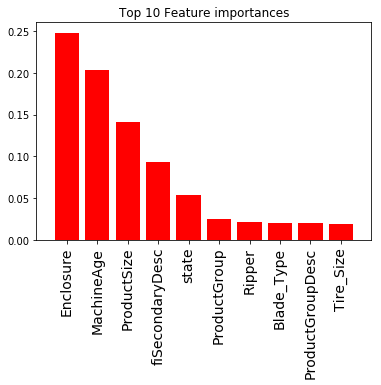

Mean Feature Importance 0.022727


In [126]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Random Forest - Top 10 Important Features\n")
for f in range(10): print("%d. %s (%f)" % (f + 1, x_Train_RS[training_vars].columns[indices[f]], importances[indices[f]])) 
#Plot the feature importances of the forest 
indices=indices[:10] 
plt.figure()
plt.title("Top 10 Feature importances")
plt.bar(range(10), importances[indices], 
        color="r", align="center") 
plt.xticks(range(10), x_Train_RS[training_vars].columns[indices], fontsize=14, rotation=90)
plt.xlim([-1, 10])
plt.show()
#Mean Feature Importance 
print("Mean Feature Importance %.6f" %np.mean(importances))

##### Randm Forest Model - Importance > 0.01

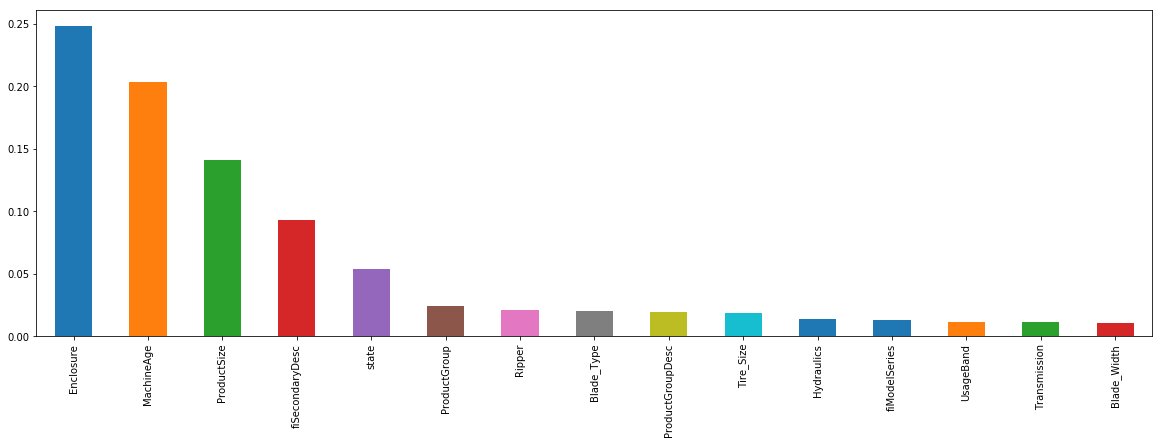

In [236]:
imp = pd.Series(rf_model.feature_importances_)
imp.index = training_vars
df = pd.DataFrame(imp)
df =df[df[0]>0.01]
df =df.iloc[:,0]
imp = pd.Series.sort_values(df,ascending=False)
imp.plot.bar(figsize=(20,6))

#### XGBoost Model

XGBoost - Top 10 Important Features

1. MachineAge (0.195714)
2. fiSecondaryDesc (0.127143)
3. ProductSize (0.121429)
4. ProductGroup (0.065714)
5. Enclosure (0.065714)
6. Blade_Type (0.044286)
7. Tire_Size (0.044286)
8. state (0.040000)
9. fiBaseModel (0.035714)
10. Ride_Control (0.027143)


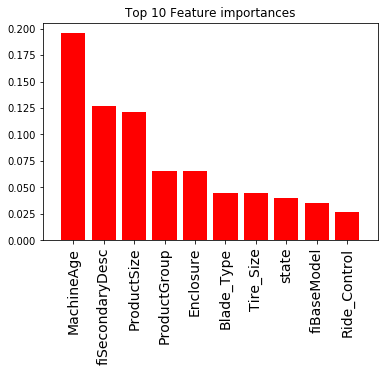

Mean Feature Importance 0.022727


In [240]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
print ("XGBoost - Top 10 Important Features\n")
for f in range(10): print("%d. %s (%f)" % (f + 1, x_Train_RS[training_vars].columns[indices[f]], importances[indices[f]])) 
#Plot the feature importances of the forest 
indices=indices[:10] 
plt.figure()
plt.title("Top 10 Feature importances")
plt.bar(range(10), importances[indices], 
        color="r", align="center") 
plt.xticks(range(10), x_Train_RS[training_vars].columns[indices], fontsize=14, rotation=90)
plt.xlim([-1, 10])
plt.show()
#Mean Feature Importance 
print("Mean Feature Importance %.6f" %np.mean(importances))

##### XGboost - Importance > 0.01

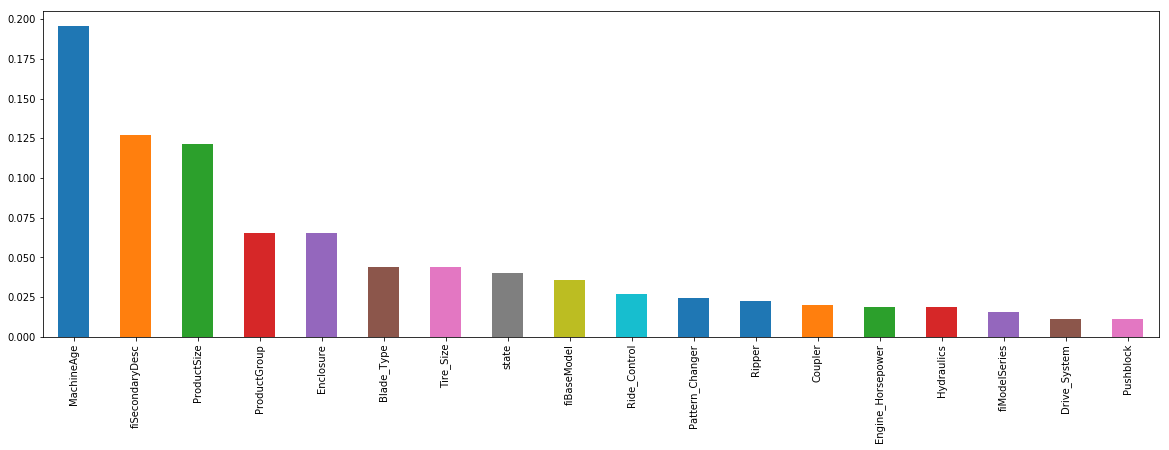

In [241]:
imp = pd.Series(xgb_model.feature_importances_)
imp.index = training_vars
df = pd.DataFrame(imp)
df =df[df[0]>0.01]
df =df.iloc[:,0]
imp = pd.Series.sort_values(df,ascending=False)
imp.plot.bar(figsize=(20,6))

#### Linear Regression Model

Linear Regression - Top 10 Important Features

1. MachineAge (9188.284511)
2. ProductSize (7102.925415)
3. Enclosure (4679.118141)
4. fiSecondaryDesc (2785.117616)
5. Hydraulics_Flow (2685.443241)
6. Blade_Type (2425.797724)
7. Turbocharged (2224.329630)
8. Ripper (2125.255009)
9. Enclosure_Type (2065.085493)
10. fiBaseModel (2047.602342)


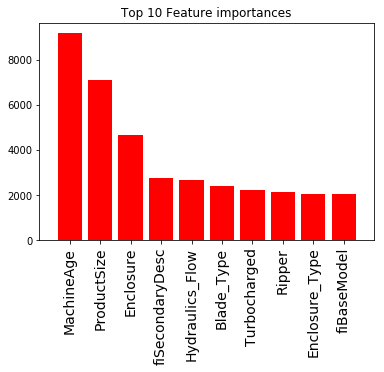

Mean Feature Importance 1430.304712


In [137]:
importances = pd.Series(np.abs(lin_model.coef_.ravel()))
indices = np.argsort(importances)[::-1]
indices = list(indices)
print ("Linear Regression - Top 10 Important Features\n")
for f in range(10): print("%d. %s (%f)" % (f + 1, x_Train2_RS[training_vars].columns[indices[f]], importances[indices[f]])) 
#Plot the feature importances of the forest 
indices=indices[:10] 
plt.figure()
plt.title("Top 10 Feature importances")
plt.bar(range(10), importances[indices], 
        color="r", align="center") 
plt.xticks(range(10), x_Train2_RS[training_vars].columns[indices], fontsize=14, rotation=90)
plt.xlim([-1, 10])
plt.show()
#Mean Feature Importance 
print("Mean Feature Importance %.6f" %np.mean(importances))

##### Linear Regression Model - Importance > 1000

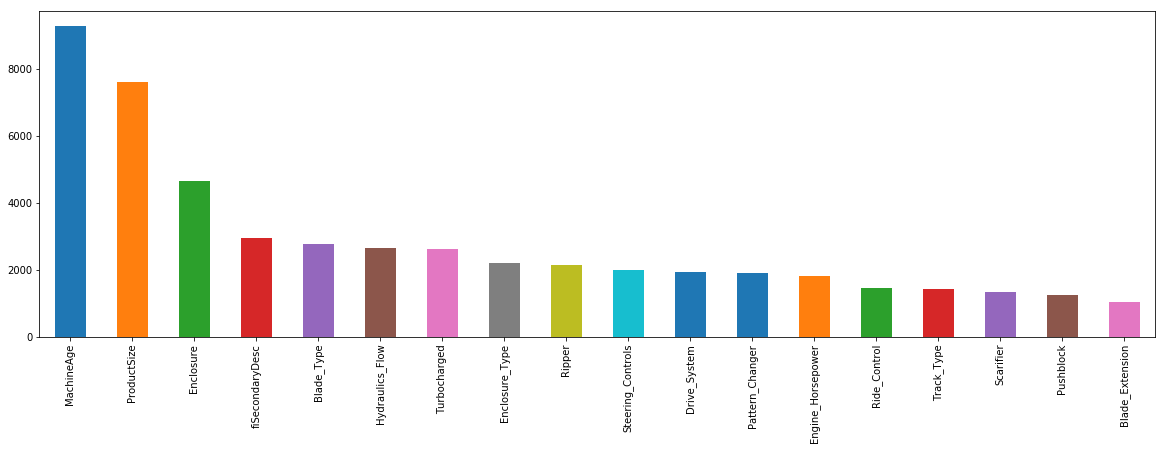

In [252]:
imp = pd.Series(np.abs(lin_model.coef_.ravel()))
imp.index = training_vars
df = pd.DataFrame(imp)
df =df[df[0]>1000]
df =df.iloc[:,0]
imp = pd.Series.sort_values(df,ascending=False)
imp.plot.bar(figsize=(20,6))

#### xgboost with Feature Selection

In [256]:
features_selected_xgb = ['MachineAge','fiSecondaryDesc','ProductSize','ProductGroup','Enclosure','Blade_Type','Tire_Size','state','fiBaseModel','Ride_Control']

In [257]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_Train_RS[features_selected_xgb], y_Train_RS, verbose=False)
pred = xgb_model.predict(x_Train_RS[features_selected_xgb])
print('xgb train mse: {}'.format(mean_squared_error(y_Train_RS, pred)))
coefficient_of_dermination = r2_score(y_Train_RS, pred)
print('Prediction: {}' .format(pred))
print('Rsquare : ', coefficient_of_dermination)

xgb train mse: 132470013.19176541
Prediction: [ 51663.0390625   15904.38867188  23939.84960938 ...,  20991.14257812
  71886.0234375   14682.24414062]
Rsquare :  0.75231375581


#### K-Fold Validation - xgboost  with Feature Selection

In [258]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = xgb_model, X = x_Train_RS[features_selected_xgb], y = y_Train_RS, cv = 10)
print('mean Rsquare is: {}' .format(scores.mean()))
print('standard deviation of accuracy is: {}' .format(scores.std()))

mean Rsquare is: 0.7391293873974734
standard deviation of accuracy is: 0.018091499328333815


#### Random Forests  with Feature Selection

In [259]:
features_selected_rf = ['MachineAge','fiSecondaryDesc','ProductSize','ProductGroup','Enclosure','Blade_Type','Tire_Size','state','Ripper','ProductGroupDesc']

In [260]:
rf_model = RandomForestRegressor()
rf_model.fit(x_Train_RS[features_selected_rf], y_Train_RS)

pred = rf_model.predict(x_Train_RS[features_selected_rf])
print('rf train mse: {}'.format(mean_squared_error(y_Train_RS, pred)))
coefficient_of_dermination = r2_score(y_Train_RS, pred)
print('Prediction: {}' .format(pred))
print('Rsquare : ', coefficient_of_dermination)

rf train mse: 45130350.191736214
Prediction: [ 47500.          14216.66666667  22658.33333333 ...,  19535.35714286
  86950.           9698.80952381]
Rsquare :  0.915617378842


#### K-Fold Validation -Random Forest with Feature Selection

In [261]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = rf_model, X = x_Train_RS[features_selected_rf], y = y_Train_RS, cv = 10)
print('mean Rsquare is: {}' .format(scores.mean()))
print('standard deviation of accuracy is: {}' .format(scores.std()))

mean Rsquare is: 0.7057362037007398
standard deviation of accuracy is: 0.021225058411280123


## Summary of Results

This project was aimed at estimating a suite of machine-learning models to predict the sale prices of used  buldozers. Notably, the Xgboost model proved to be the superior model in terms of performance. It is worth noting that the parsimonious model comprising features selected through the modeling process performed 
comparably( Rsquare of **73.9%** versus **74.3%**)  to the model with all features, including those with importance scores close to zero. The Random Forest model was the runner model with an Rsquare of approx. **73%**.